<a href="https://colab.research.google.com/github/Mahnoor-Shoukat-Ali/PGD__DeepLearning/blob/main/Assignment_2_MNIST_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [5]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Normalize the images.
training_images = (training_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [7]:
# Reshape the images.
training_images = np.expand_dims(training_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [8]:
num_filters = 8
filter_size = 3
pool_size = 2

In [31]:
# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model.
model.compile(
  optimizer = 'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [33]:
# Train the model.
history = model.fit(
  training_images,
  to_categorical(training_labels),
  epochs=15, batch_size = 32,
  validation_split = 0.2
)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8259 - loss: 0.6571 - val_accuracy: 0.9563 - val_loss: 0.1569
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9598 - loss: 0.1403 - val_accuracy: 0.9703 - val_loss: 0.1045
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9718 - loss: 0.0990 - val_accuracy: 0.9763 - val_loss: 0.0856
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9786 - loss: 0.0748 - val_accuracy: 0.9746 - val_loss: 0.0833
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9814 - loss: 0.0628 - val_accuracy: 0.9790 - val_loss: 0.0755
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9793 - val_loss: 0.0742
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9850 - loss: 0.0484 - val_accuracy: 0.9793 - val_loss: 0.0701
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9851 -

In [34]:
# Evaluate the model
#test_loss, test_acc = model.evaluate(test_images, test_labels)
#test_acc

test_loss, test_acc = model.evaluate(test_images, tf.keras.utils.to_categorical(test_labels)) # Convert test labels to one-hot encoding
test_acc, test_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9757 - loss: 0.0821


(0.9794999957084656, 0.06744816154241562)

In [28]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labels[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[7 2 1 0 4]
[7 2 1 0 4]


In [35]:
# Save the model
model.save('mnist_cnn.h5')

In [36]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_cnn.h5')

In [ ]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[2.2677605e-14 2.2568211e-11 9.5492692e-10 2.8488481e-08 7.5800856e-14
 2.3947869e-16 5.4190387e-30 9.9999994e-01 1.8275405e-13 2.5598804e-11]


In [29]:
print(test_labels[0])

7


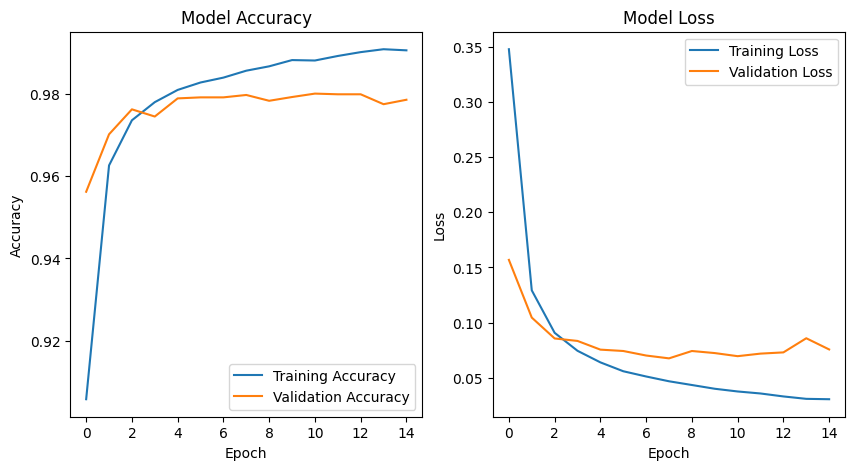

In [37]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()